# 第12章 : 分類の機械学習モデルとその評価方法

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

In [329]:
# 乳がんのデータセット
from sklearn.datasets import load_breast_cancer

In [330]:
breast_cancer = load_breast_cancer()

In [331]:
df_X = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
df_y = pd.DataFrame(breast_cancer['target'], columns=['target'])

In [332]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [333]:
df.shape

(569, 31)

In [334]:
df['target'].unique() # 2クラス分類であるとわかる

array([0, 1])

In [335]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

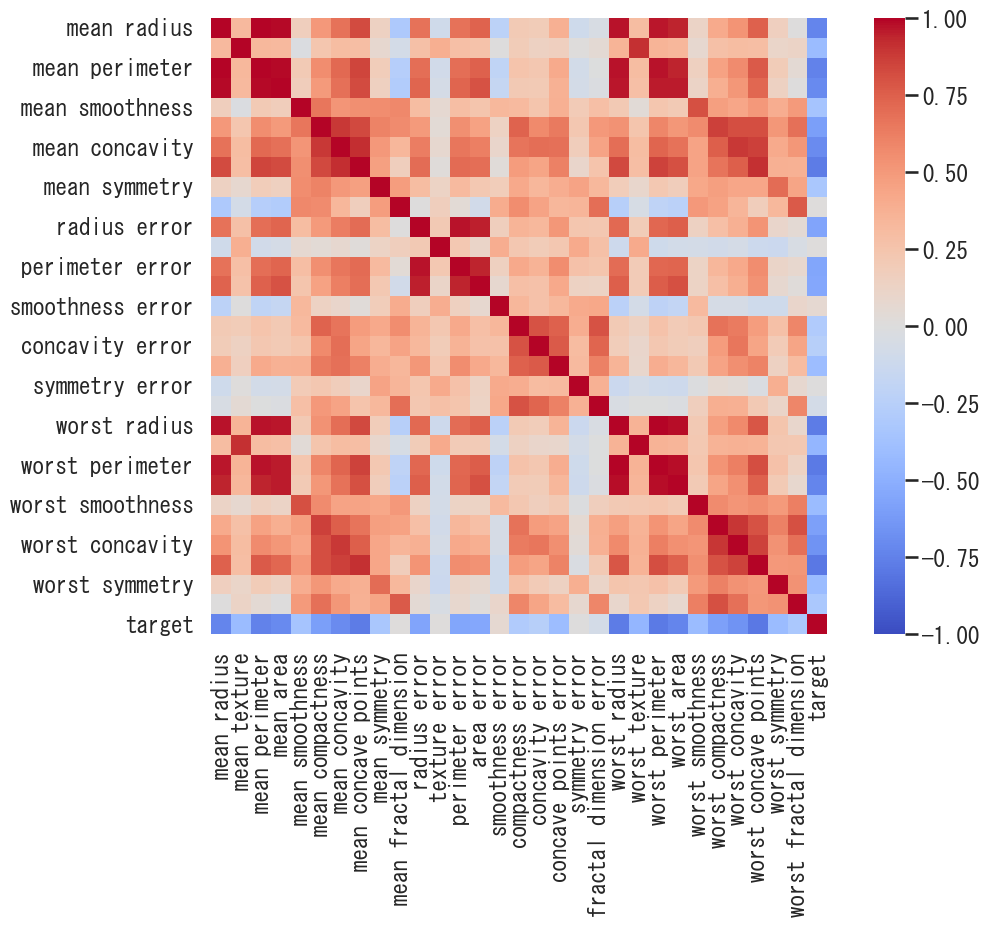

In [337]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), square=True, vmin=-1, cmap='coolwarm')
plt.show()

In [338]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

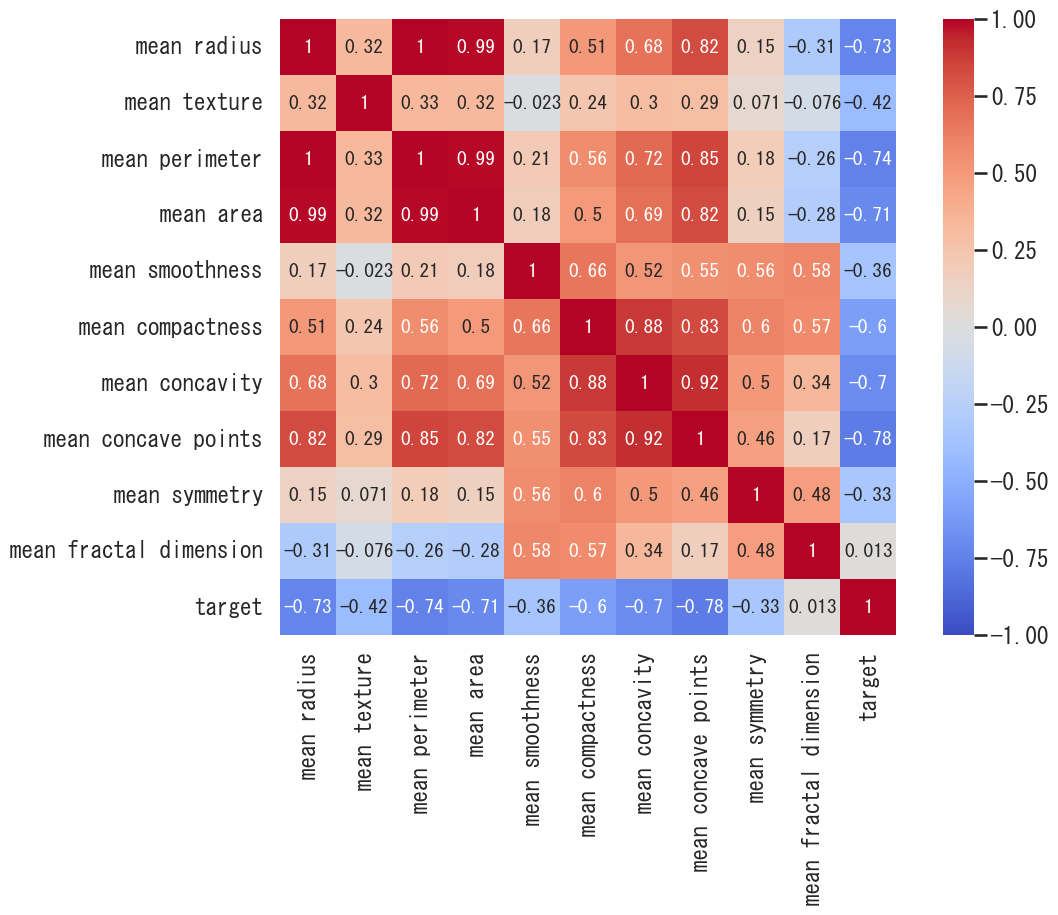

In [339]:
# mean, targetだけ取得
col = df.columns.str.contains('mean|target') # meanまたはtargetをカラム名に含むものだけ取得
plt.figure(figsize=(12, 8))
sns.heatmap(df.loc[:, col].corr(), annot=True, annot_kws={'size':14},
    square=True, vmin=-1, cmap='coolwarm')
plt.show()

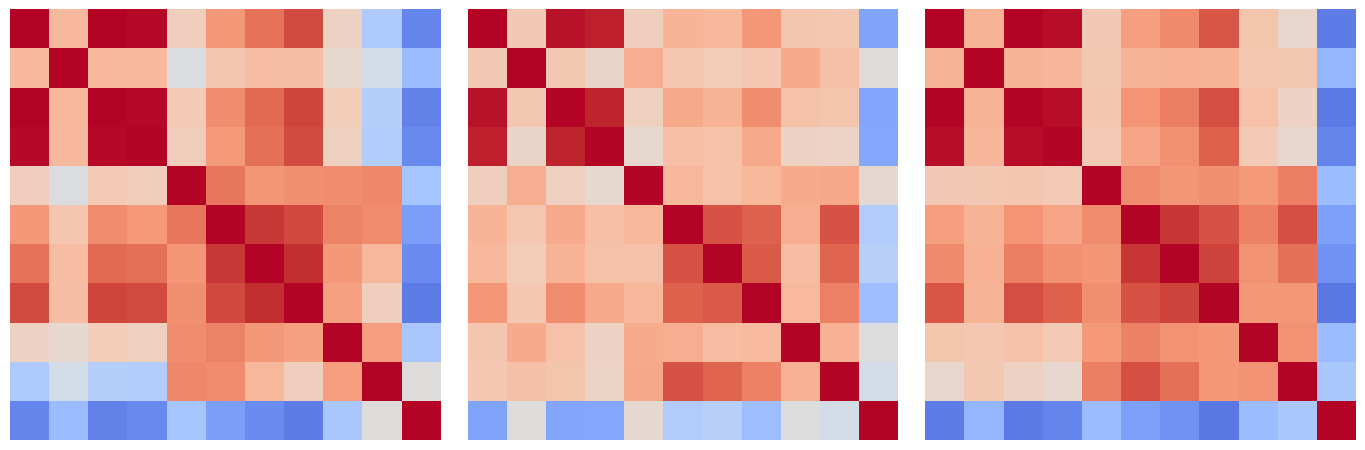

In [340]:
fig, axes = plt.subplots(1, 3, figsize=(14,6), tight_layout=True)
sns.heatmap(df.loc[:, df.columns.str.contains('mean|target')].corr(), xticklabels=False, 
    yticklabels=False, cbar=False, square=True, vmin=-1, cmap='coolwarm', ax=axes[0])
sns.heatmap(df.loc[:, df.columns.str.contains('error|target')].corr(), xticklabels=False, 
    yticklabels=False, cbar=False, square=True, vmin=-1, cmap='coolwarm', ax=axes[1])
sns.heatmap(df.loc[:, df.columns.str.contains('worst|target')].corr(), xticklabels=False, 
    yticklabels=False, cbar=False, square=True, vmin=-1, cmap='coolwarm', ax=axes[2])
plt.show()

In [341]:
df = df.loc[:, df.columns.str.contains('mean|target')] # meanだけ使用
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [342]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6), tight_layout=True)
    sns.histplot(data=df, y=feature, hue='target', ax=axes[0])
    sns.boxplot(data=df, x='target', y=feature, width=0.8, ax=axes[1])
    sns.swarmplot(data=df, x='target', y=feature, alpha=0.8, size=3, ax=axes[2])
    plt.suptitle(feature)
    plt.show()

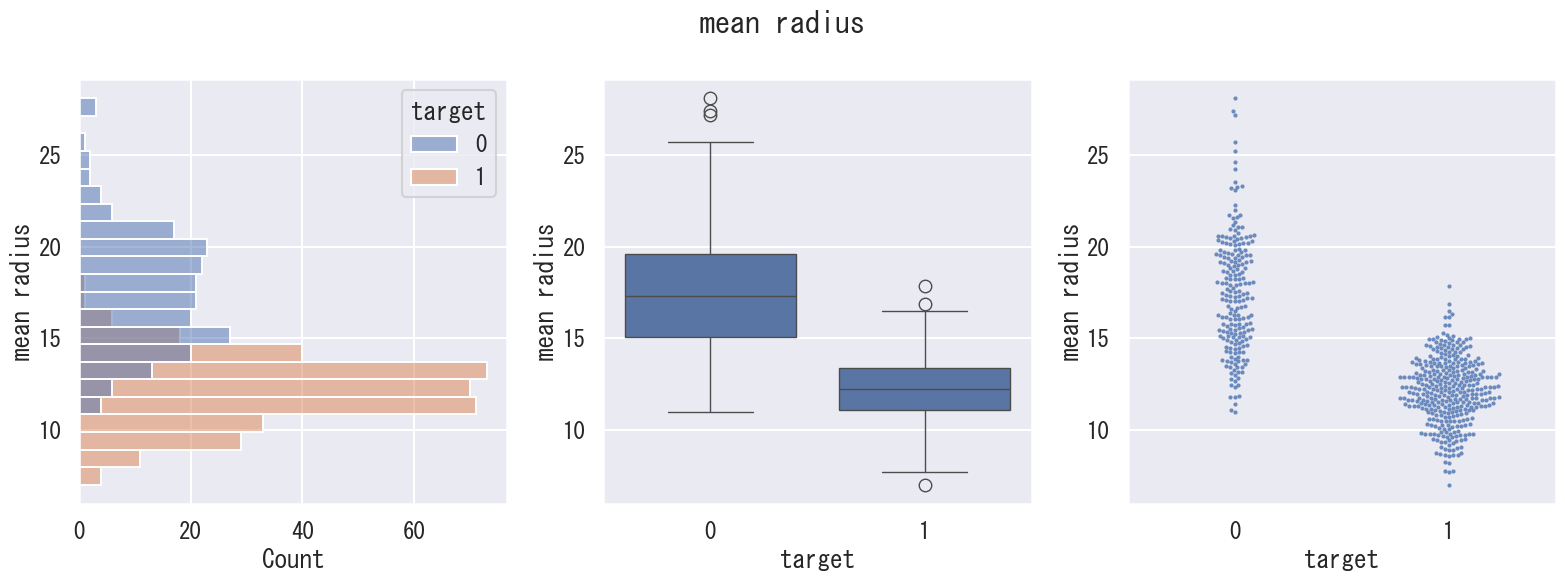

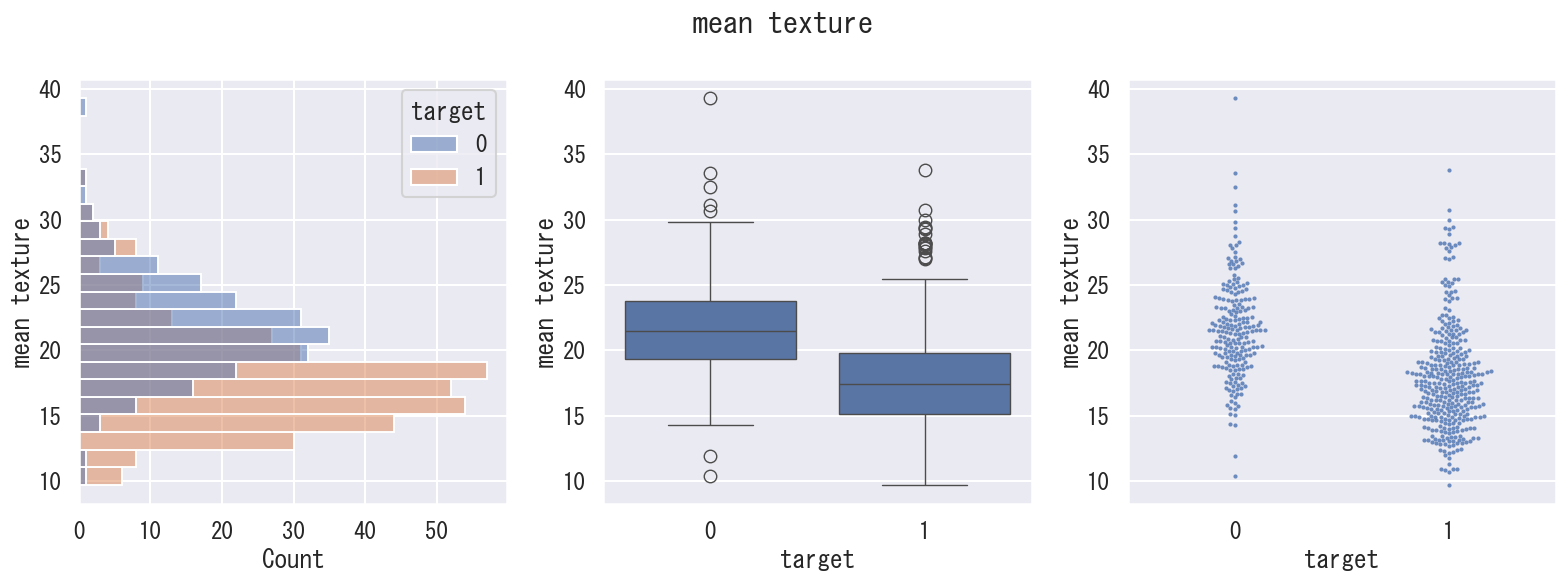

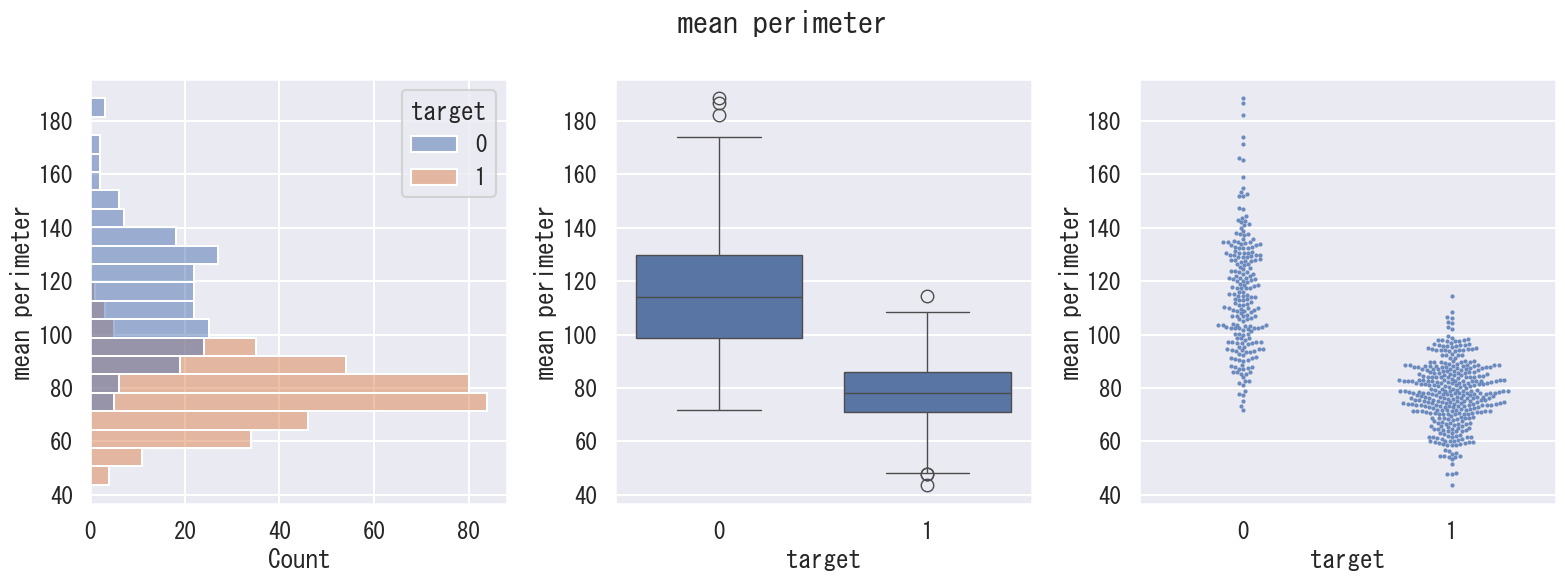

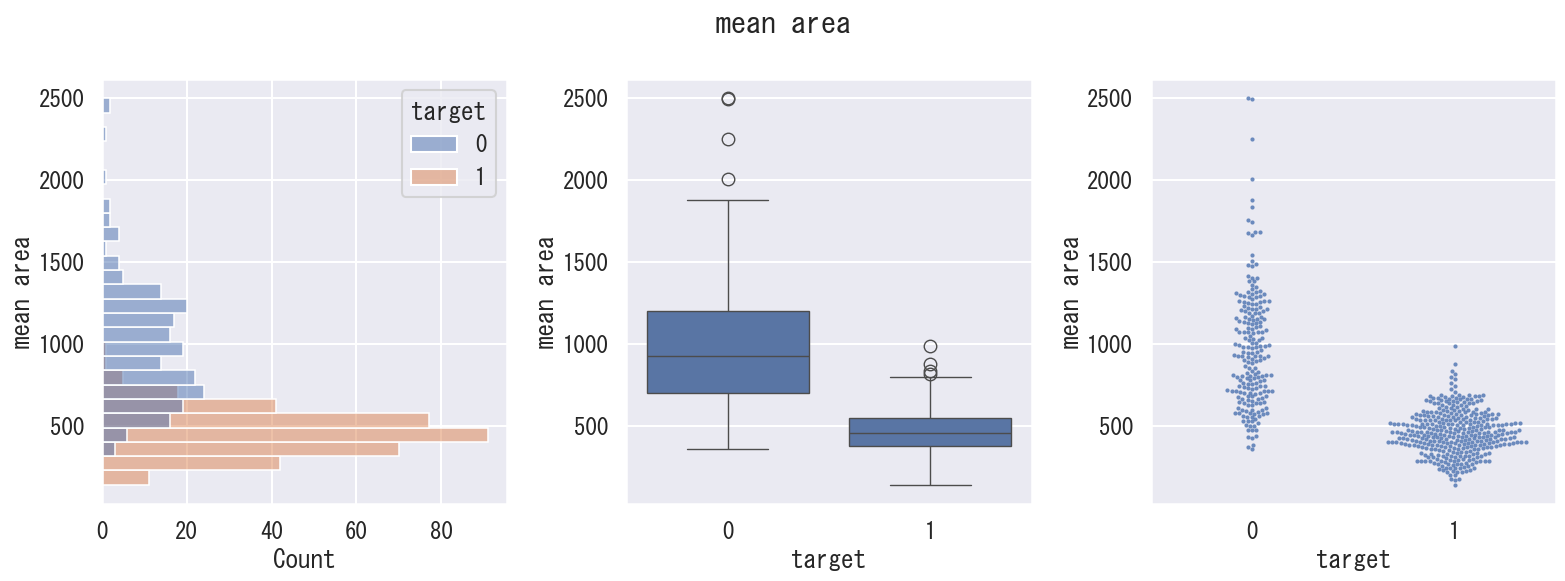

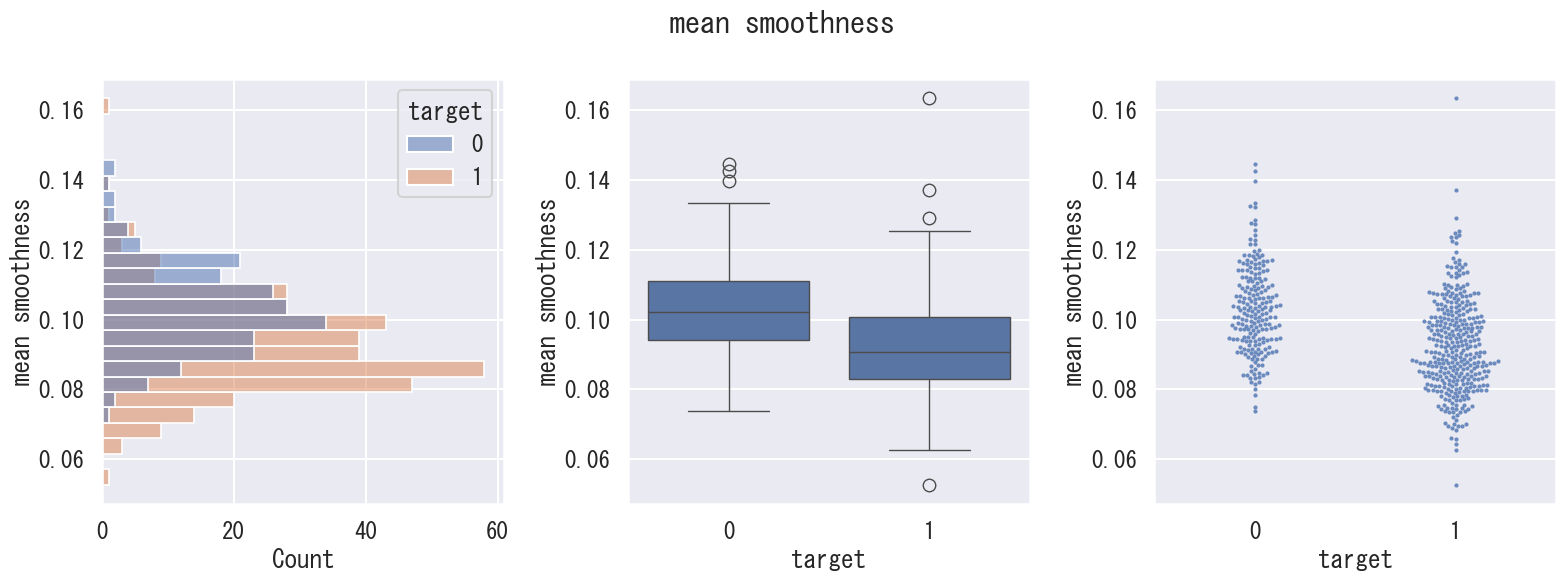

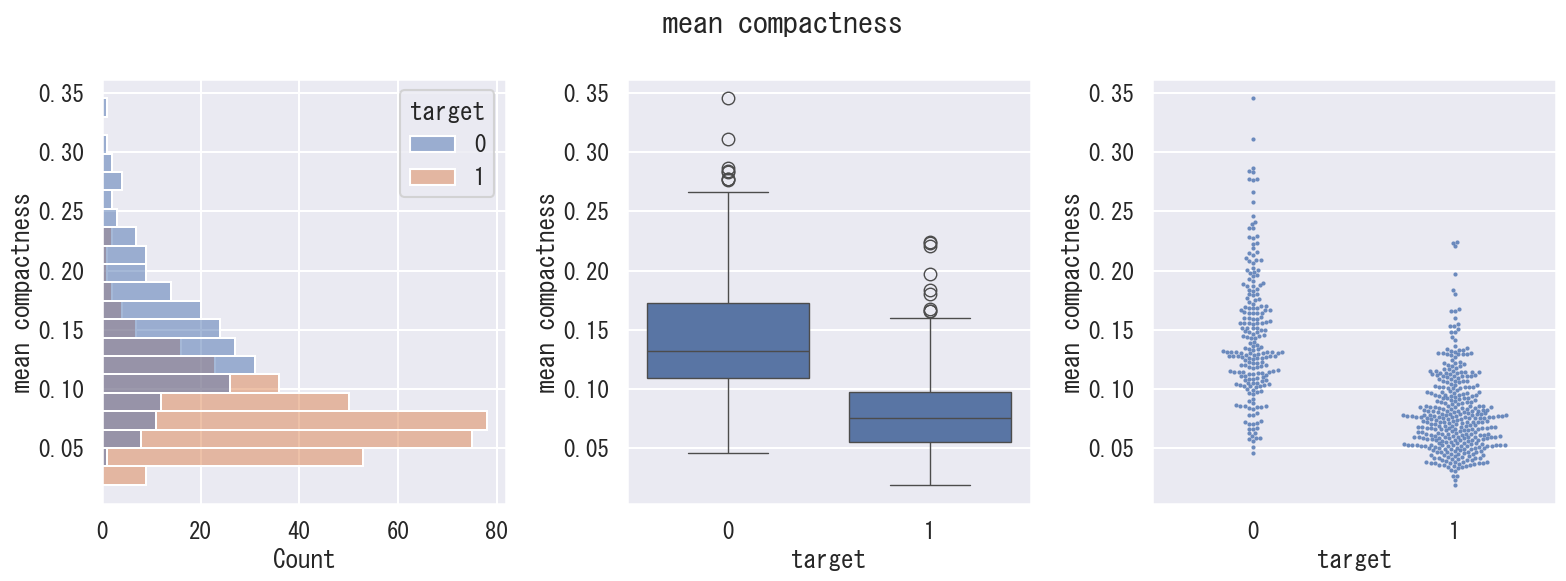

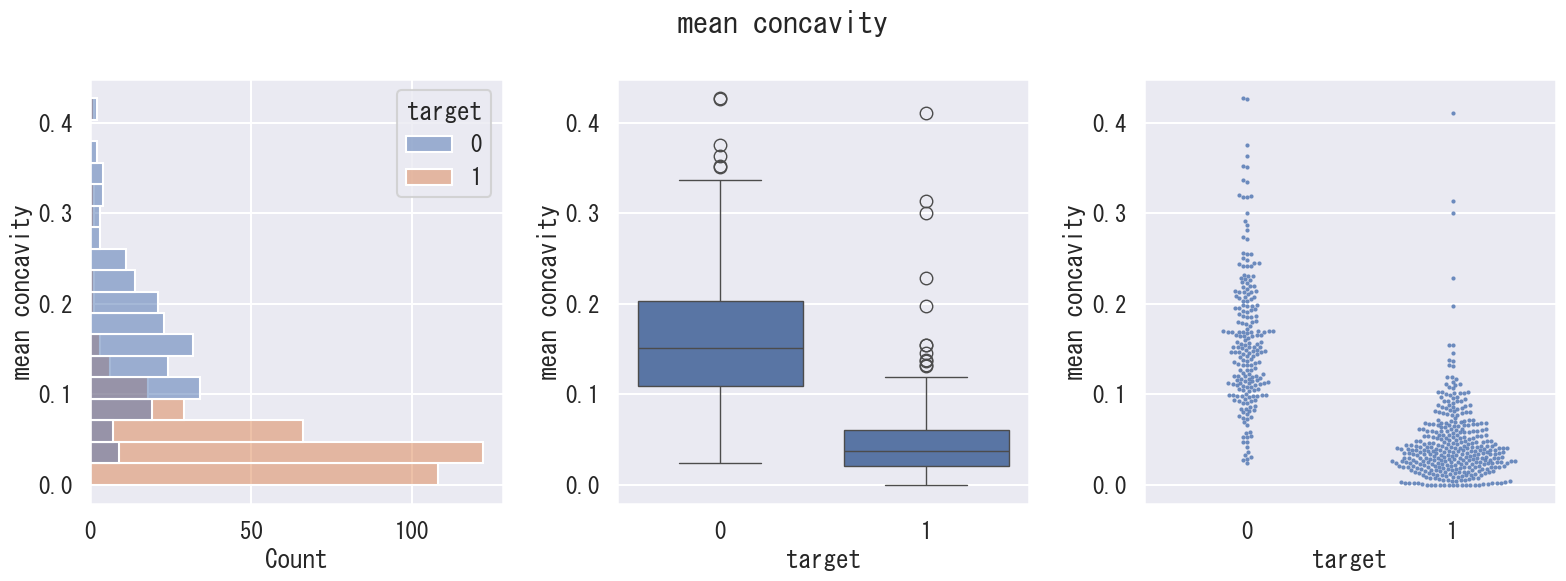

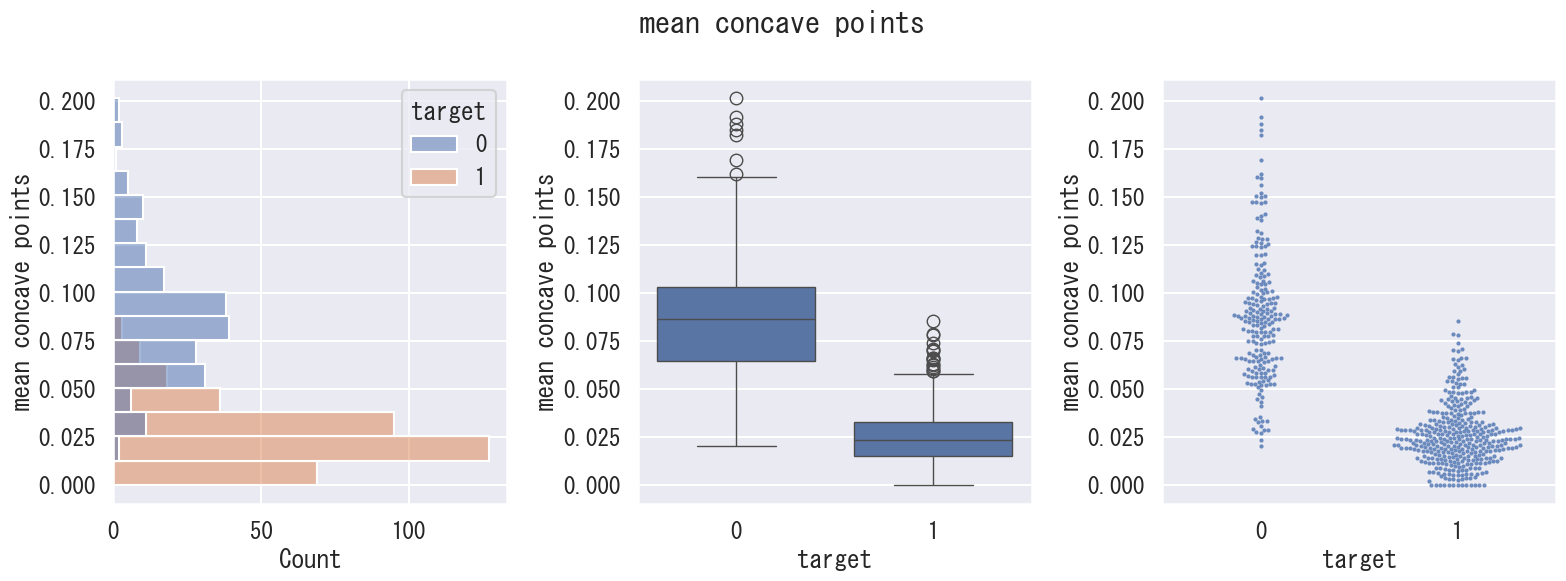

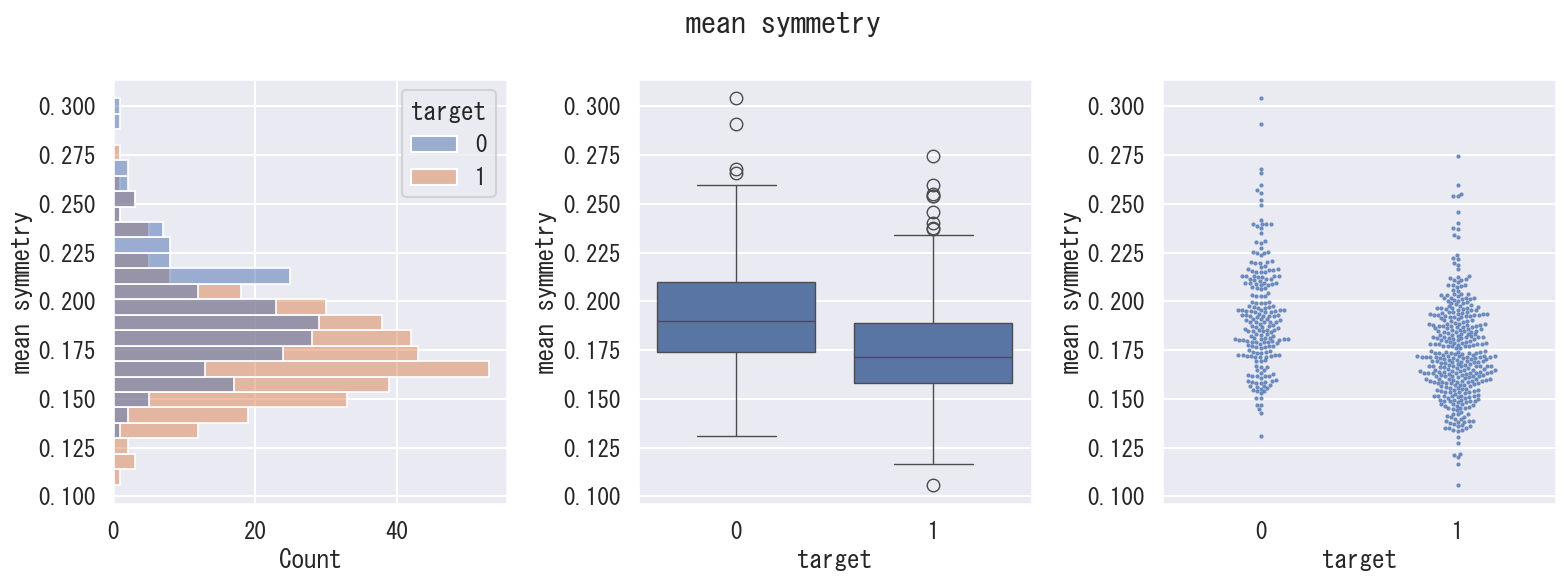

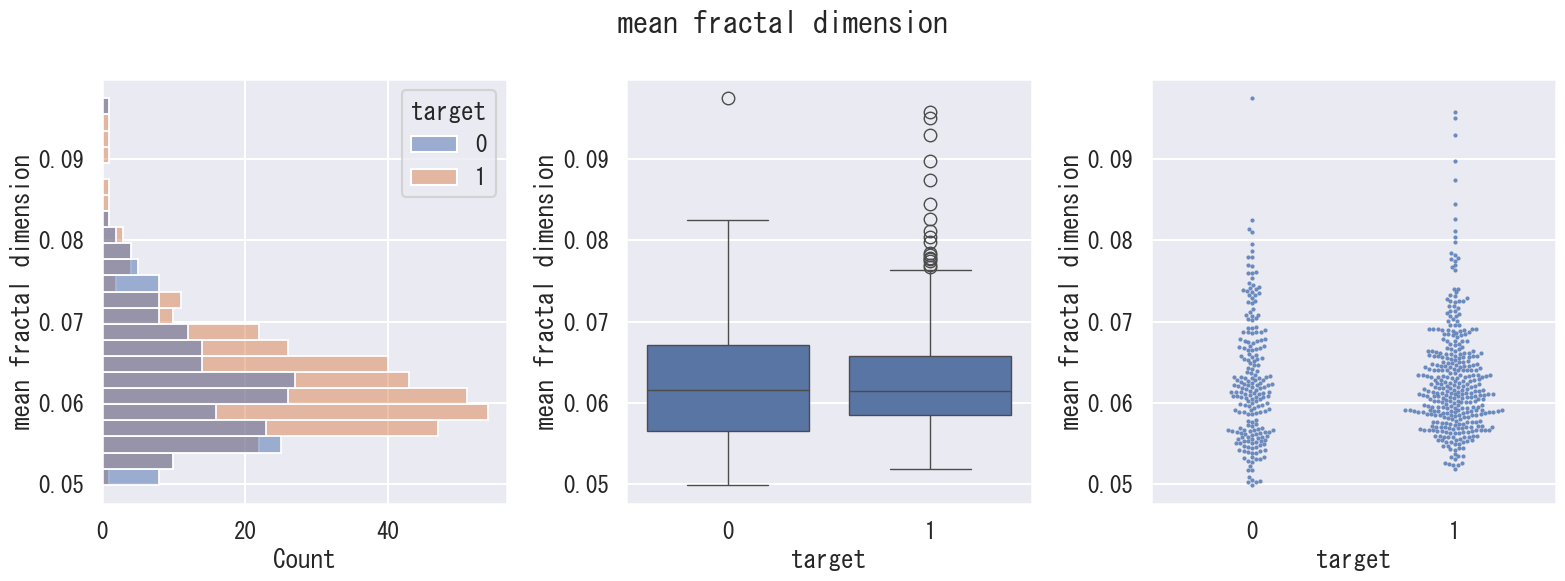

In [343]:
for feature in df.columns[:-1]:
    plot_data(feature)

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], # 説明変数、目的変数
    test_size=0.3, random_state=17, stratify=df.iloc[:, -1])    

In [346]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [347]:
scaler.fit(X_train)

StandardScaler()

In [348]:
X_train_scaled = scaler.transform(X_train)

In [349]:
X_test_scaled = scaler.transform(X_test)

### RandomForestClassifier

In [350]:
from sklearn.ensemble import RandomForestClassifier

In [351]:
rf_model = RandomForestClassifier(random_state=17)

In [352]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=17)

In [353]:
rf_pred = rf_model.predict(X_test_scaled)

In [354]:
rf_pred[:5]

array([1, 1, 1, 0, 0])

In [355]:
rf_model.score(X_test_scaled, y_test) # 正解の割合

0.9473684210526315

In [356]:
rf_model.score(X_train_scaled, y_train)

1.0

In [357]:
prob = rf_model.predict_proba(X_test_scaled)
prob[:10]

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.18, 0.82],
       [0.17, 0.83],
       [1.  , 0.  ],
       [0.58, 0.42],
       [0.  , 1.  ]])

## Confusion Matrix(混合行列)

In [358]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [359]:
confusion_matrix(y_test, rf_pred)

array([[ 60,   4],
       [  5, 102]])

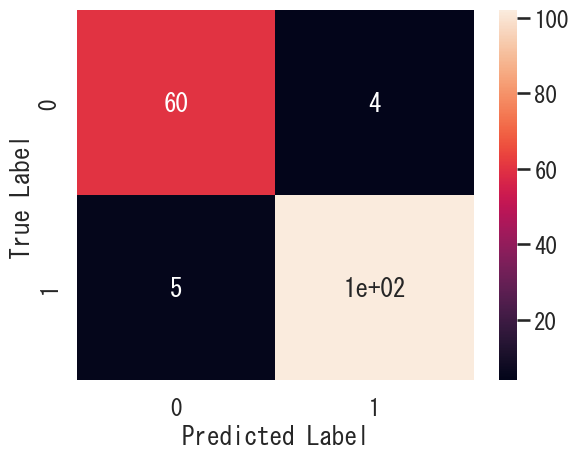

In [360]:
# 混合行列の可視化
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

真陰性(True Negative), 偽陽性(False Positive)

偽陰性(False Negative), 真陽性(True Positive)

という配置

## precision(適合率), recall(再現率), f1_score(F1値)

In [361]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



### Accuracy(正解率)
Accuracyは予測がどれだけ正しかったかを見る指標である。
$$
\mathrm{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

### Precision(適合率)
Precisionは正と予測したものがどれだけ正しかったかを見る指標である。
$$
\mathrm{Precesion} = \frac{TP}{TP + FP}
$$

### Recall(再現率)
Recallは実際に正であったもののうち、どれだけ正と予測できたかを見る指標である。
$$
\mathrm{Recall} = \frac{TP}{TP + FN}
$$

### F値
F値はPrecisionとRecallの調和平均である。

$$
\begin{align}
\mathrm{F}1 &= \frac{2 \cdot \mathrm{Precision} \cdot \mathrm{Recall}}{\mathrm{Precision} + \mathrm{Recall}}\\
\mathrm{F}0.5 &= \frac{1.25 \cdot \mathrm{Precision} \cdot \mathrm{Recall}}{0.25 \cdot \mathrm{Precision} + \mathrm{Recall}}\\
\mathrm{F}2 &= \frac{5 \cdot \mathrm{Precision} \cdot \mathrm{Recall}}{4 \cdot \mathrm{Precision} + \mathrm{Recall}}
\end{align}
$$

In [362]:
pre = precision_score(y_test, rf_pred)
pre

np.float64(0.9622641509433962)

In [363]:
rec = recall_score(y_test, rf_pred)
rec

np.float64(0.9532710280373832)

In [364]:
f1_score(y_test, rf_pred)

np.float64(0.9577464788732394)

In [365]:
# F1スコアを調和平均で計算して確認
2 * pre * rec / (pre + rec)

np.float64(0.9577464788732395)

In [366]:
rf_model_new = RandomForestClassifier(random_state=17)
rf_model_new.fit(X_train, y_train)
rf_pred_new = rf_model_new.predict(X_test)
print(classification_report(y_test, rf_pred_new))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



## KNeighborsClassifier

In [367]:
from sklearn.neighbors import KNeighborsClassifier

In [368]:
kn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [369]:
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [370]:
kn_pred = kn_model.predict(X_test_scaled)
kn_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [371]:
kn_model.score(X_test_scaled, y_test)

0.9649122807017544

In [372]:
kn_model.score(X_train_scaled, y_train)

0.9472361809045227

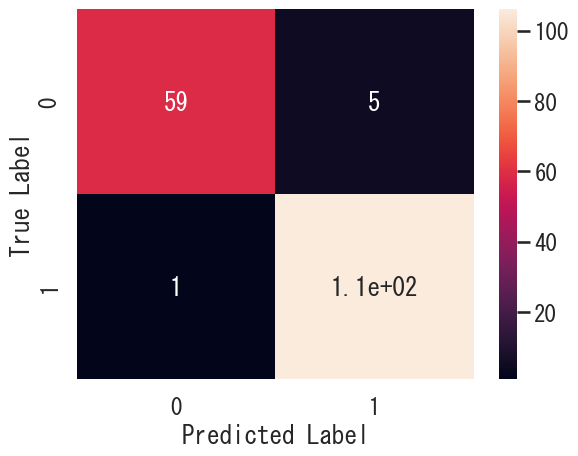

In [373]:
# confusion matrix作成
sns.heatmap(confusion_matrix(y_test, kn_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [374]:
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [375]:
kn_model_new = KNeighborsClassifier()
kn_model_new.fit(X_train, y_train)
kn_pred_new = kn_model_new.predict(X_test)
print(classification_report(y_test, kn_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        64
           1       0.89      0.95      0.92       107

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



## SVC(SupportVectorClassifier)

In [376]:
from sklearn.svm import SVC

In [377]:
svc_model = SVC()

In [378]:
svc_model.fit(X_train_scaled, y_train)

SVC()

In [379]:
svc_pred = svc_model.predict(X_test_scaled)
svc_pred[:5]

array([1, 1, 1, 0, 0])

In [380]:
svc_model.score(X_test_scaled, y_test)

0.9532163742690059

In [381]:
svc_model.score(X_train_scaled, y_train)

0.9597989949748744

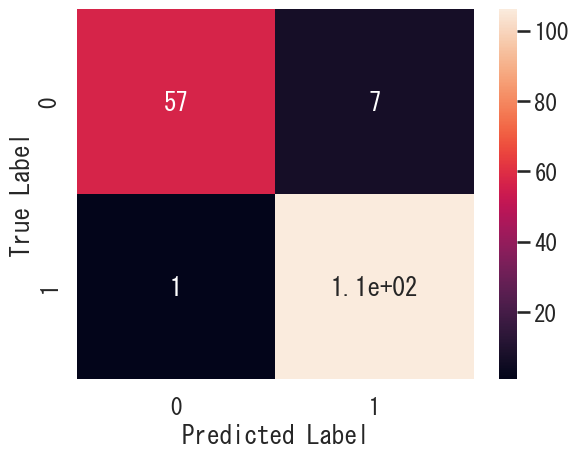

In [382]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [383]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [384]:
svc_model_new = SVC()
svc_model_new.fit(X_train, y_train)
svc_pred_new = svc_model_new.predict(X_test)
print(classification_report(y_test, svc_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.87      0.99      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



## ロジスティック回帰

In [385]:
from sklearn.linear_model import LogisticRegression

In [386]:
log_model = LogisticRegression()

In [387]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [388]:
log_pred = log_model.predict(X_test_scaled)
log_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [389]:
log_model.score(X_test_scaled, y_test)

0.9532163742690059

In [390]:
log_model.score(X_train_scaled, y_train)

0.9371859296482412

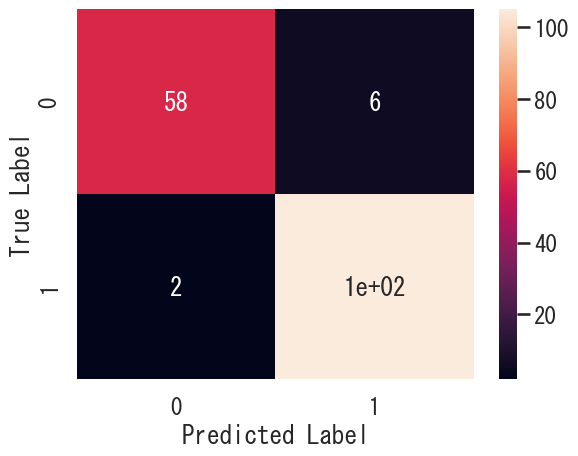

In [391]:
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [392]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [393]:
log_model_new = LogisticRegression(max_iter=150)
log_model_new.fit(X_train, y_train)
log_pred_new = log_model_new.predict(X_test)
print(classification_report(y_test, log_pred_new))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



c:\Users\masuda.yuya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## モデルの評価
- precision_recall_curve
- f1_score, precision, recall
- roc_curve

### PR曲線(Precision Recall Curve)

In [394]:
model = SVC(probability=True)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.87      0.99      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [395]:
prob = model.predict_proba(X_test)
prob[:10]

array([[0.13877338, 0.86122662],
       [0.08178289, 0.91821711],
       [0.08396061, 0.91603939],
       [0.13139917, 0.86860083],
       [0.96748644, 0.03251356],
       [0.08846793, 0.91153207],
       [0.18003918, 0.81996082],
       [0.61770508, 0.38229492],
       [0.3951381 , 0.6048619 ],
       [0.07983394, 0.92016606]])

In [396]:
from sklearn.metrics import precision_recall_curve

In [397]:
precision, recall, threshold = precision_recall_curve(y_test, prob[:, 1])

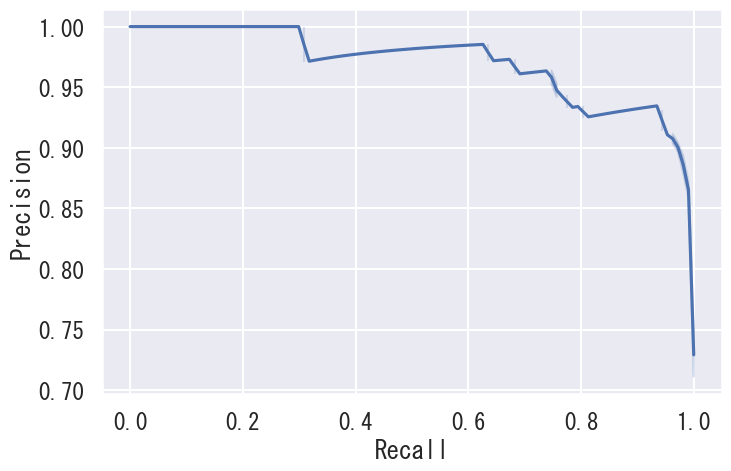

In [398]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=recall, y=precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [399]:
# F1計算
f1_scores = []
for p, r in zip(precision, recall):
    score = 2 * p * r / (p + r)
    f1_scores.append(score)
f1_scores[:5]

[np.float64(0.7697841726618705),
 np.float64(0.7725631768953068),
 np.float64(0.7753623188405798),
 np.float64(0.7781818181818182),
 np.float64(0.781021897810219)]

In [400]:
len(threshold), len(f1_scores)

(171, 172)

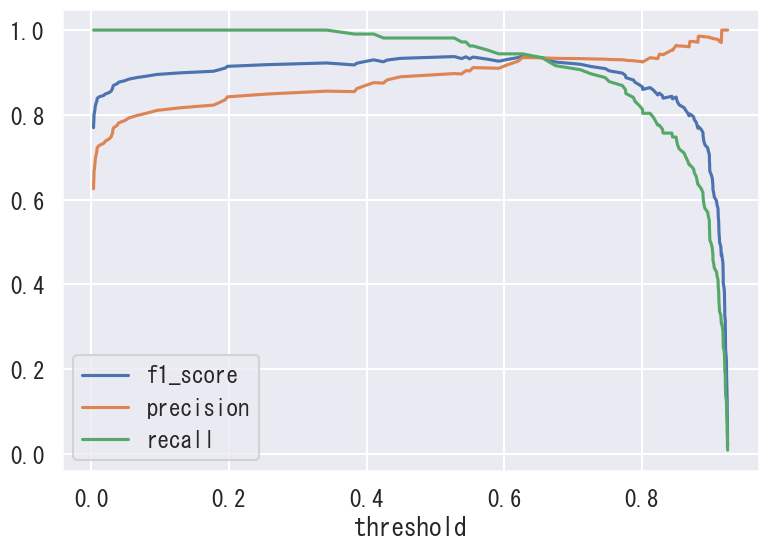

In [401]:
plt.figure(figsize=(9, 6))
sns.lineplot(x=threshold, y=f1_scores[:-1], label='f1_score')
sns.lineplot(x=threshold, y=precision[:-1], label='precision')
sns.lineplot(x=threshold, y=recall[:-1], label='recall')
plt.xlabel('threshold')
plt.legend()
plt.show()

In [402]:
np.argmax(f1_score)

np.int64(0)

In [403]:
precision[63], recall[63], f1_scores[63], threshold[53]

(np.float64(0.9351851851851852),
 np.float64(0.9439252336448598),
 np.float64(0.9395348837209302),
 np.float64(0.4491991316296801))

In [404]:
pred_new = np.where(prob[:, 1] >= threshold[63], 1, 0)

In [405]:
f1_score(y_test, pred_new)

np.float64(0.9395348837209302)

### ROC曲線